# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [58]:
weather_api_key 


'8fe2aad34219ce0e43c4c59d06766a22'

In [59]:
#Performing Api calls
#weather_api_key = weather_api_key
#weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(weather_url)


In [60]:
#Setting up url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

#Testing
response = requests.get(weather_url+'Sacramento').json()
response

{'coord': {'lon': -121.32, 'lat': 38.47},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 46.71,
  'feels_like': 39.31,
  'temp_min': 41,
  'temp_max': 52,
  'pressure': 1020,
  'humidity': 87},
 'visibility': 16093,
 'wind': {'speed': 10.29, 'deg': 150},
 'clouds': {'all': 1},
 'dt': 1582447988,
 'sys': {'type': 1,
  'id': 4838,
  'country': 'US',
  'sunrise': 1582469184,
  'sunset': 1582509078},
 'timezone': -28800,
 'id': 5389519,
 'name': 'Sacramento',
 'cod': 200}

In [69]:
# Create list to hold Data from API
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for c in cities:  
    city_data = requests.get(weather_url+c).json()
    # Try statement to append calls where value is found 
    
    try: 
        #response = requests.get(f"{url}&q={city}").json() 
        city.append(city_data["name"])
        cloudiness.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        wind_speed.append(city_data["wind"]["speed"])
        print(city_data["name"])
        #city_record = response["name"]
        #print(f"Processing Record {record} | {city_record}")
        #print(f"{url}&q={city}")
        
            
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("Skipping no data for:" ,city)
   
    #pass
    # continue



Beginning Data Retrieval
-------------------------------
Hasaki
Albany
Mayya
Longyearbyen
Souillac
Ulladulla
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla']
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla']
San Patricio
Grand Gaube
Kahului
Mataura
Udachny
Saskylakh
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh']
Bac Lieu
Kysyl-Syr
Yellowknife
Staryy Oskol
Swift Current
Busselton
Hay River
Dongsheng
Ati
Esperance
Hermanus
Hobart
Blind River
Castellaneta
Rikitea
Airai
Klaksvik
Molango
San Rafael del Sur
Asau
Vaini
Labuhan
East London
Khandyga
Mattru
Khatanga
Nhulunbuy
Nikolskoye
Mount Gambier
Maniitsoq
Atuona
Mar del Plata
Port Alfred
Northam
Barrow
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului',

Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi', 'Chokurdakh', 'Thompson', 'Nabire', 'Burnie', 'Lebu', '

Hobyo
Kiama
Adrar
Soure
Ponta do Sol
Inta
Smithers
Ribeira Grande
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh'

Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi', 'Chokurdakh', 'Thompson', 'Nabire', 'Burnie', 'Lebu', '

Merauke
Kuytun
Sioux Lookout
Gamba
Narsaq
Saint George
Cuamba
Saint-Paul
Progreso
Kilindoni
Bathsheba
Fortuna
Bethel
Lompoc
Carlos Chagas
Porto Tolle
San Borja
Alice Springs
Byron Bay
Doume
Torit
Codrington
Morwa
Herat
Katsuura
Xingyi
Kutno
Rio Grande
Luba
Arrondissement de Saintes
Beringovskiy
Los Llanos de Aridane
Khovd
Cagliliog
Vrangel
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Neve

Susanville
Sinnamary
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi', 'Chokurdakh', 'Thompson', 'Nabire'

Broome
Taltal
Vidim
Berlevag
Muravlenko
Kommunar
Grand Forks
Nichinan
Pangnirtung
Pochutla
Palmer
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 

San Bernardo
Rodrigues Alves
Yura
Guerrero Negro
Pindwara
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi

Rantepao
Warrnambool
Bonabeerie
Juneau
Bhuj
Stonewall
Petropavl
Nakhon Si Thammarat
Khani
Hofn
Chui
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera'

Fairbanks
Bonavista
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi', 'Chokurdakh', 'Thompson', 'Nabire',

Kirakira
Marystown
Wagar
Coyhaique
Lata
Weston
Puerto Cabezas
Moree
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnak

Meadow Lake
Yeppoon
Camacha
Canakkale
Narrabri
Griffith
Saldanha
Vao
Ust'-Kulom
College
Raudeberg
Glomfjord
Korhogo
Houston
Lokosovo
Ilulissat
Mossamedes
Acari
Havelock
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo'

Fernandopolis
Bereda
Myitkyina
Roald
North Myrtle Beach
San Ramon
Jalu
Isangel
Shakiso
Mandalgovi
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 

Opuwo
Champasak
Atasu
Seoul
Ibresi
Borba
Manaure
Hamilton
Arras
Puerto Escondido
Iranshahr
Acajutla
Amapa
Leshukonskoye
Punta Alta
Arazede
Toamasina
Intibuca
Ous
Aksu
Kununurra
Baharly
Makakilo City
Baft
Muli
Van
Kiryat Gat
Kupang
Uryupinsk
Nouadhibou
Shalakusha
Chumikan
Constitucion
Bainbridge Island
Quattro Castella
Bilma
Teknaf
Worthing
Bowen
Napanee
Abalak
Kuching
Karratha
Rio Gallegos
Qui Nhon
Margate
Fengcheng
Kamenka
Ulu-Telyak
Yuli
Marsaxlokk
Ust'-Omchug
Urucui
Manjacaze
Jiwani
Kieta
Sola
Santa Cruz de la Sierra
Port Blair
Matay
Ilhabela
Nadapuram
Valparaiso
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau',

Turaif
Mahon
Mackenzie
Mont-Dore
Nouakchott
Skipping no data for: ['Hasaki', 'Albany', 'Mayya', 'Longyearbyen', 'Souillac', 'Ulladulla', 'San Patricio', 'Grand Gaube', 'Kahului', 'Mataura', 'Udachny', 'Saskylakh', 'Bac Lieu', 'Kysyl-Syr', 'Yellowknife', 'Staryy Oskol', 'Swift Current', 'Busselton', 'Hay River', 'Dongsheng', 'Ati', 'Esperance', 'Hermanus', 'Hobart', 'Blind River', 'Castellaneta', 'Rikitea', 'Airai', 'Klaksvik', 'Molango', 'San Rafael del Sur', 'Asau', 'Vaini', 'Labuhan', 'East London', 'Khandyga', 'Mattru', 'Khatanga', 'Nhulunbuy', 'Nikolskoye', 'Mount Gambier', 'Maniitsoq', 'Atuona', 'Mar del Plata', 'Port Alfred', 'Northam', 'Barrow', 'Santa Cruz del Sur', 'Rudnogorsk', 'Nevelsk', 'Yulara', 'Qaanaaq', 'Waingapu', 'Te Anau', 'Cabo San Lucas', 'Mehamn', 'Dikson', 'Puerto Ayora', 'Yabelo', 'Avarua', 'Luderitz', 'Beloha', 'Topola', 'Arraial do Cabo', 'Kodiak', 'Mazyr', 'Bengkulu', 'Port Elizabeth', 'Dunedin', 'Avera', 'Ust-Nera', 'Ushuaia', 'Talnakh', 'Tiksi', 'Chokurdakh

Pastavy


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
#create dictionary for the DataFrame
city_dict = {
    "City":city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
  "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
   "Max Temp":max_temp,
   "Wind Speed":wind_speed
}
 
#Creating DataFrame
weather_df = pd.DataFrame(city_dict)
weather_df.count()


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [71]:
#Creating DataFrame
#weather_df = pd.DataFrame(city_dict)
#weather_df.count()
#Display DataFrame
weather_df.to_csv("../output_data/weather_df.csv")
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hasaki,20,JP,1582448351,34,35.73,140.83,50.00,14.99
1,Albany,1,US,1582448352,68,42.60,-73.97,28.00,5.82
2,Mayya,100,RU,1582448120,75,61.73,130.28,-16.60,2.24
3,Longyearbyen,20,SJ,1582448241,70,78.22,15.64,-2.20,10.29
4,Souillac,75,MU,1582448356,70,-20.52,57.52,84.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

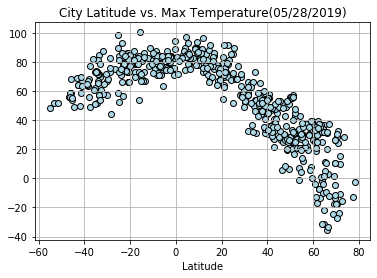

In [79]:

#Creating Scatter Plot  for Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],facecolors ="lightblue",edgecolors="black")


#Label Scatter Plot
plt.title("City Latitude vs. Max Temperature(05/28/2019)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("plot1.png")
plt.show()


#### Latitude vs. Humidity Plot

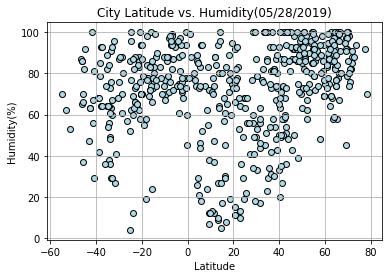

In [80]:
#Creating Scatter Plot  for Latitude vs. Humidity Plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"],facecolors ="lightblue", edgecolors="black")


#Label Scatter Plot
plt.title("City Latitude vs. Humidity(05/28/2019)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("plot2.png")
plt.show()


#### Latitude vs. Cloudiness Plot

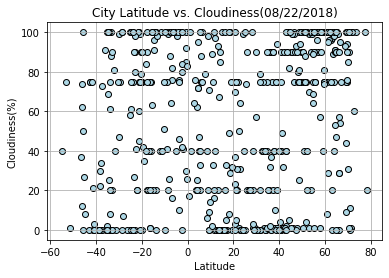

In [81]:
#Creating Scatter Plot  for latitude vs. Cloudiness 
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],facecolors ="lightblue", edgecolors="black")

#Label Scatter Plot
plt.title("City Latitude vs. Cloudiness(08/22/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("plot3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

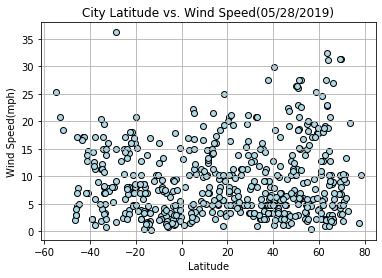

In [82]:
#Creating a Scatter Plot for Latitude vs. Wind Speed 
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],facecolors ="lightblue", edgecolors="black")


#Label Scatter Plot
plt.title("City Latitude vs. Wind Speed(05/28/2019)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("plot4.png")
plt.show()




## Linear Regression

In [2]:
# OPTIONAL: Create a function to create Linear Regression plots


In [3]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression